In [12]:
import os
import pandas as pd
import numpy as np

DIR = os.getcwd()
print(DIR)

df = pd.read_csv(DIR + "/2008contributions.csv",
                    parse_dates = ["contribution_receipt_date"]) 

df.head()



/Users/lukedobrovic/Data/CampaignContributions


,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,committee_name.1,entity_type,...,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,increased_limit,sub_id,pdf_url,line_number_label
0,C00193433,EMILY'S LIST,2008,M10,29933614894,11AI,2458018,415592,NaN,IND,...,F3X,4042920091114302988,t,MEMO,2008,SA,NaN,4042920091114370912,http://docquery.fec.gov/cgi-bin/fecimg/?299336...,Contributions From Individuals/Persons Other T...
1,C00193433,EMILY'S LIST,2008,M10,29933611419,11AI,2467065,415592,NaN,IND,...,F3X,4042920091114302988,t,NaN,2008,SA,NaN,4042920091114360446,http://docquery.fec.gov/cgi-bin/fecimg/?299336...,Contributions From Individuals/Persons Other T...
2,C00193433,EMILY'S LIST,2008,M3,28990613101,11AI,2349804,327583,NaN,IND,...,F3X,4031920081086070319,t,MEMO,2008,SA,NaN,4040920081087233475,http://docquery.fec.gov/cgi-bin/fecimg/?289906...,Contributions From Individuals/Persons Other T...
3,C00088484,FRIENDS OF SENATOR CARL LEVIN,2007,Q1,27020120591,11AI,NaN,286627,NaN,IND,...,F3,1041720120009728668,t,* EARMARKED CONTRIBUTION: SEE BELOW,2008,SA,NaN,1041720120009729862,http://docquery.fec.gov/cgi-bin/fecimg/?270201...,Contributions From Individuals/Persons Other T...
4,C00431445,OBAMA FOR AMERICA,2008,M10,11972575354,17A,7087420,753817,NaN,IND,...,F3P,4112820111146120195,t,NaN,2008,SA,NaN,4113020111146674515,http://docquery.fec.gov/cgi-bin/fecimg/?119725...,Contributions From Individuals/Persons Other T...


In [13]:
df_selections = df[[ "committee_name", "contribution_receipt_date",
                    "contribution_receipt_amount", "contributor_employer", 
                   "contributor_occupation"]]

In [14]:
faux = ["MISSOURI", "BRITISH", "DISTRICT", "CHICAGO", "INTERNATIONAL", "MO", "UNIVERSITY HOSPITAL", "FLORIDA"]

df_selections = df_selections[~df_selections.contributor_employer.str.contains('|'.join(faux))]

In [15]:
df_selections.committee_name.unique()
#OBAMA Victory Fund, OBAMA for President, OBAMA Action Fund are funds with OBAMA in name

array(["EMILY'S LIST", 'FRIENDS OF SENATOR CARL LEVIN',
       'OBAMA FOR AMERICA', 'AL FRANKEN FOR SENATE', 'ACTBLUE',
       'NEW JERSEY REPUBLICAN STATE COMMITTEE',
       'HILLARY CLINTON FOR PRESIDENT', 'OBAMA VICTORY FUND',
       'BILL FOSTER FOR CONGRESS COMMITTEE', 'NADER FOR PRESIDENT 2008',
       'JOE GARCIA FOR CONGRESS', 'JOHN EDWARDS FOR PRESIDENT',
       'DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE', 'RANGEL FOR CONGRESS',
       'ALASKANS FOR BEGICH', 'SHULMAN FOR CONGRESS',
       'DARCY BURNER FOR CONGRESS', 'RICK NORIEGA FOR TEXAS',
       'MCCAIN-PALIN VICTORY 2008', 'MOVEON.ORG POLITICAL ACTION',
       'COMMITTEE TO ELECT CHRIS MURPHY', 'MARTIN FOR SENATE INC',
       "1199 SERVICE EMPLOYEES INT'L UNION FEDERAL POLITICAL ACTION FUND",
       'COMMITTEE TO ELECT ALAN GRAYSON',
       'DNC SERVICES CORPORATION/DEMOCRATIC NATIONAL COMMITTEE',
       'JUDY FEDER FOR CONGRESS', 'JSTREETPAC', 'MUSGROVE FOR U S SENATE',
       'TOM ALLEN FOR SENATE', 'KISSELL FOR CONGRESS

In [16]:
df_OBAMA = df_selections[df_selections["committee_name"].str.contains("OBAMA")]

df_OBAMA.reset_index()

df_MCCAIN = df_selections[df_selections["committee_name"].str.contains("MCCAIN")]

df_MCCAIN.reset_index()

,index,committee_name,contribution_receipt_date,contribution_receipt_amount,contributor_employer,contributor_occupation
0,94,MCCAIN-PALIN VICTORY 2008,2008-10-22,1000.0,COLUMBIA UNIVERSITY,ACADEMIC
1,256,JOHN MCCAIN 2008 INC.,2007-04-10,125.0,COLUMBIA UNIVERSITY,RESEARCH
2,580,MCCAIN VICTORY 2008,2008-08-19,2000.0,COLUMBIA UNIVERSITY,MEDICAL DOCTOR
3,749,MCCAIN-PALIN COMPLIANCE FUND INC.,2008-10-08,500.0,COLUMBIA UNIVERSITY MEDICAL CENTER,CEO-PHYSICIANS AND SURGEONS
4,1471,JOHN MCCAIN 2008 INC.,2008-03-20,2300.0,COLUMBIA UNIVERSITY,STUDENT
5,1619,MCCAIN VICTORY 2008,2008-08-19,1000.0,COLUMBIA UNIVERSITY,M.D.
6,1901,JOHN MCCAIN 2008 INC.,2007-06-30,250.0,COLUMBIA UNIVERSITY,RESEARCH
7,1905,MCCAIN-PALIN VICTORY 2008,2008-10-20,500.0,COLUMBIA UNIVERSITY,PHYSICIAN
8,2163,JOHN MCCAIN 2008 INC.,2007-10-31,125.0,COLUMBIA UNIVERSITY,RESEARCH
9,2229,MCCAIN VICTORY 2008,2008-05-23,7500.0,COLUMBIA UNIVERSITY,ACADEMIC


In [17]:
df_OBAMA = df_OBAMA.groupby(["contribution_receipt_date"], as_index=False).sum()

df_MCCAIN = df_MCCAIN.groupby(["contribution_receipt_date"], as_index=False).sum()

Text(0.5, 1.0, 'Contributions to Committees w/ MCCAIN in their name since announcement of 2020 OBAMA Candidacy')

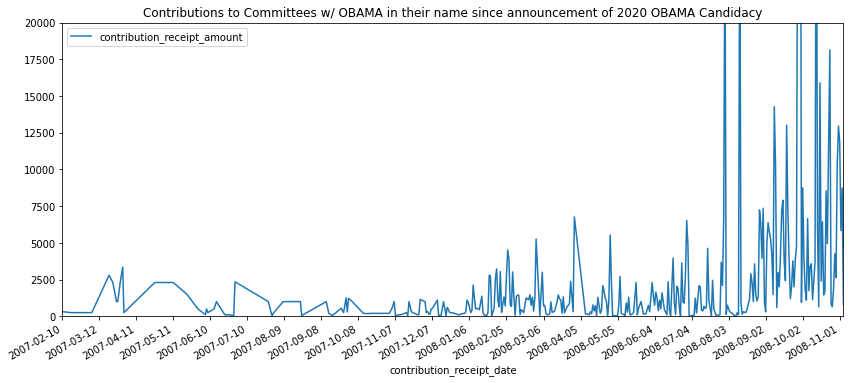

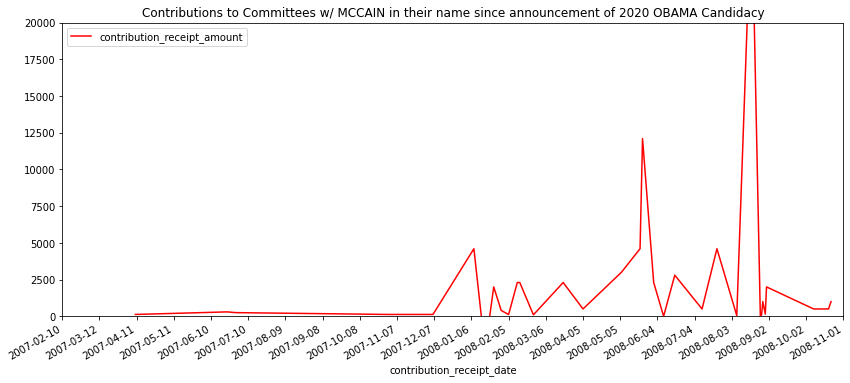

In [28]:
from datetime import datetime, timedelta
t = np.arange(datetime(2007,2,10), datetime(2008,11,5), timedelta(days=30)).astype(datetime)
# y = [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000]

ax1 = df_OBAMA.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
             figsize=(14, 6))
ax1.set_xticks(t)
ax1.set_ylim([0, 20000])
ax1.set_title("Contributions to Committees w/ OBAMA in their name since announcement of 2020 OBAMA Candidacy")


ax2 = df_MCCAIN.plot(x="contribution_receipt_date", y="contribution_receipt_amount",
                   figsize=(14,6),
                   color="red")
ax2.set_xticks(t)
ax2.set_ylim([0, 20000])
ax2.set_title("Contributions to Committees w/ MCCAIN in their name since announcement of 2020 OBAMA Candidacy")

In [21]:
df_committees = df_selections.groupby(["committee_name"], as_index=False).sum()
df_committees.sort_values(by="contribution_receipt_amount", ascending=False, inplace=True)
df_committees.reset_index(inplace=True)

df_committees.head()

,index,committee_name,contribution_receipt_amount
0,152,OBAMA FOR AMERICA,570986.85
1,153,OBAMA VICTORY FUND,230352.69
2,59,DNC SERVICES CORPORATION/DEMOCRATIC NATIONAL C...,175978.41
3,92,HILLARY CLINTON FOR PRESIDENT,105792.75
4,167,REPUBLICAN NATIONAL COMMITTEE,48285.00


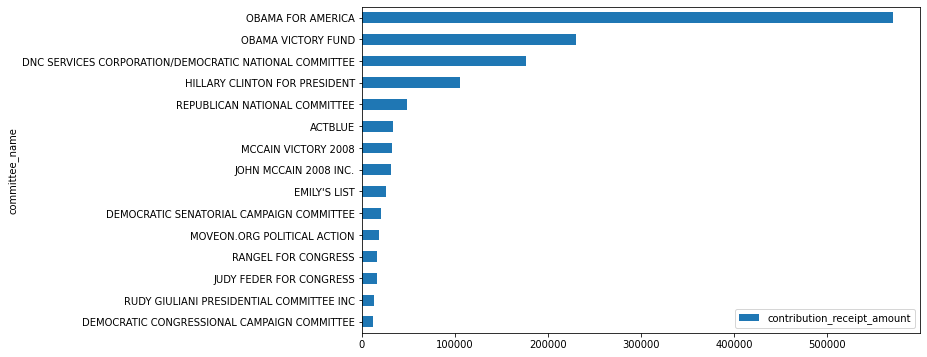

In [29]:
ax3 = df_committees.head(15).plot(kind="barh",
                        x = "committee_name",
                        y = "contribution_receipt_amount",
                                 figsize=(10,6))
ax3.invert_yaxis()

In [31]:
occupations = df_selections["contributor_occupation"].value_counts()
occupations

PROFESSOR                          1264
GRADUATE STUDENT                    659
PHYSICIAN                           543
RESEARCHER                          178
SCIENTIST                           165
                                   ... 
EPIDEMIOLOGIST                        1
DEPUTY CONTROLLER                     1
RETIRED PROFESSOR OF PEDIATRICS       1
DIR. INTERNAL AUDIT -IT               1
WEB DEVELOPER                         1
Name: contributor_occupation, Length: 494, dtype: int64

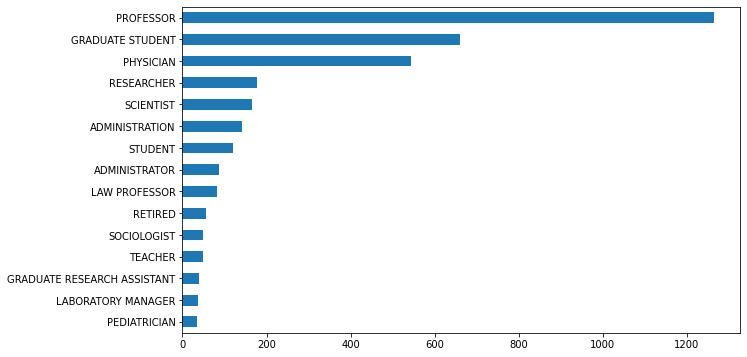

In [32]:
ax4 = occupations.head(15).plot(kind="barh",
                               figsize=(10,6))
ax4.invert_yaxis()